In [1]:
import sys, os, time
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
#plt.switch_backend('TkAgg')
import torch
from torch import nn
import torch.nn.functional as F
from torchdiffeq import odeint_adjoint as odeint
import gym
import h5py as hf
import cv2 as cv

import foundation as fd
from foundation import util
from foundation import nets
from foundation import train

In [2]:
idx = 102
sample = {}
with hf.File('/home/fleeb/workspace/pose_nets/se3nets-pytorch/data/cartpole-mass1/cartpole-mass1-n400-s100_000000.h5', 'r') as f:
    for k in f.keys():
        try:
            sample[k] = f[k][idx]
        except ValueError:
            sample[k] = f[k].value
for k, v in sample.items():
    print(k,v.shape)

controls (100, 1)
damping (2,)
depths (101,)
labels (101,)
masses (2,)
rgbs (101,)
states (101, 4)


In [3]:
rgbs = np.stack([util.str_to_rgb(rgb) for rgb in sample['rgbs']])
rgbs.shape

(101, 120, 240, 3)

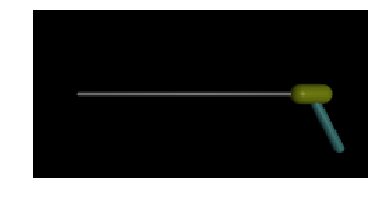

In [22]:
plt.figure()

for img in rgbs:
    plt.cla()
    plt.imshow(img)
    plt.axis('off')
    plt.pause(0.01)
pass

In [4]:
t = 20

In [49]:
frame1 = rgbs[t]
frame2 = rgbs[t+3]

<IPython.core.display.Javascript object>


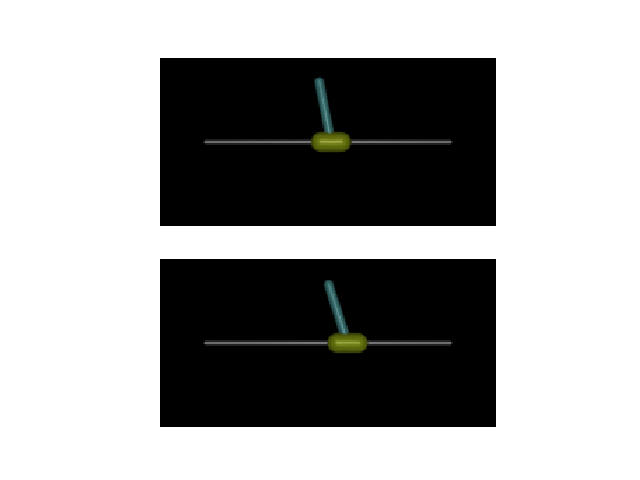

In [50]:
fig, (ax1, ax2) = plt.subplots(2)
plt.sca(ax1)
plt.axis('off')
plt.imshow(frame1)
plt.sca(ax2)
plt.axis('off')
plt.imshow(frame2)

In [51]:
prvs = cv.cvtColor(frame1,cv.COLOR_BGR2GRAY)
hsv = np.zeros_like(frame1)
hsv[...,1] = 255
next = cv.cvtColor(frame2,cv.COLOR_BGR2GRAY)
flow = cv.calcOpticalFlowFarneback(prvs,next, None, 
                                   pyr_scale=0.1, levels=2, winsize=12, 
                                   iterations=10, poly_n=5, poly_sigma=1.2, flags=cv.OPTFLOW_FARNEBACK_GAUSSIAN)

<IPython.core.display.Javascript object>


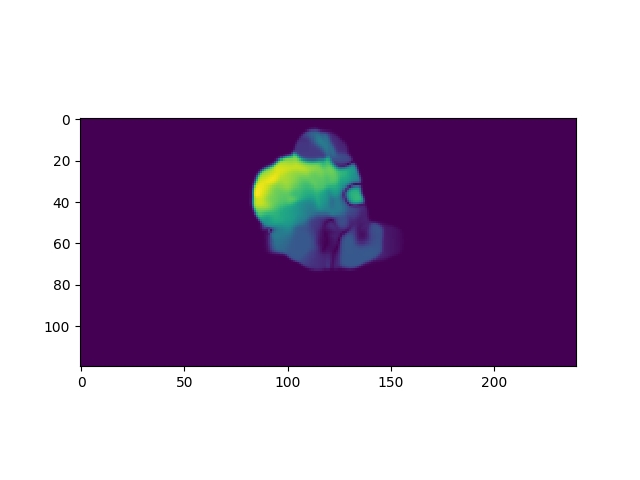

In [52]:
bgr = np.concatenate([flow, np.zeros((120,240,1),np.float32)], -1)
mag, ang = cv.cartToPolar(flow[...,0], flow[...,1])
hsv[...,0] = ang*180/np.pi/2
hsv[...,2] = cv.normalize(mag,None,0,255,cv.NORM_MINMAX)
bgr = cv.cvtColor(hsv,cv.COLOR_HSV2BGR)
plt.figure()
plt.imshow(mag)
#plt.imshow(bgr+frame1)
#plt.imshow(bgr+frame2)

In [4]:
cv.OPTFLOW_FARNEBACK_GAUSSIAN

False